<a href="https://colab.research.google.com/github/cristiang26/Lab_2-convoluciones-y-correlaciones-/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install wfdb   #Instalacion en colab
import wfdb
import pandas as pd

Convolucion

Marices inicales
x: [1 0 7 3 5 9 9 6 0 9]
h: [5 6 0 0 8 4 2]
matriz convolucionada
y: [  5   6  35  57  51  79 157 136 102 143 172 102  42  84  36  18]


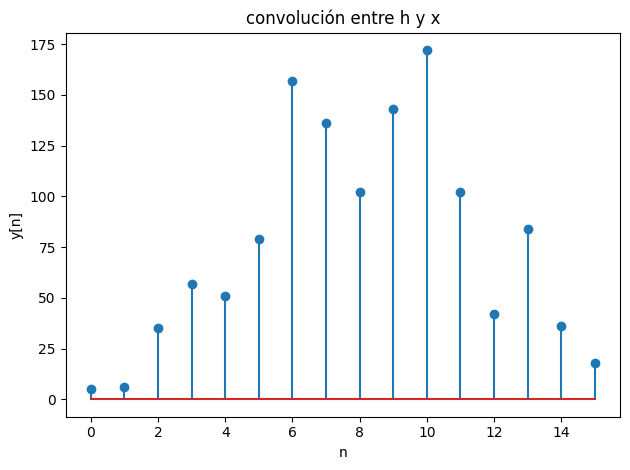

In [ ]:
h = np.array([5,6,0,0,8,4,2], dtype=int)
x = np.array([1,0,7,3,5,9,9,6,0,9], dtype=int)

y=np.convolve(h,x)

n_x=np.arange(len(x))
n_h=np.arange(len(h))
n_y=np.arange(len(y))
print("Marices inicales")
print("x:",x)
print("h:",h)
print("matriz convolucionada")
print("y:",y)

plt.figure()
plt.stem(n_y, y)
plt.title("convolución entre h y x")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.tight_layout()
plt.show()

Marices inicales
x: [1 0 7 5 8 7 0 2 9 5]
h: [5 6 0 0 8 7 9]
matriz convolucionada
y: [  5   6  35  67  78  90 107  99 219 236 151  79  86 121 116  45]


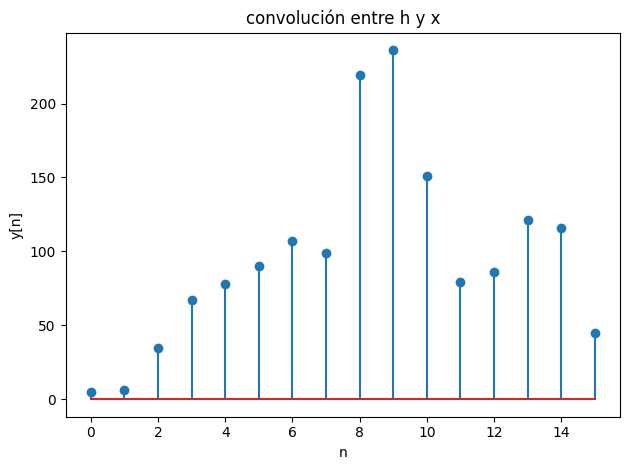

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h_1 = np.array([5,6,0,0,8,7,9], dtype=int)
x_1 = np.array([1,0,7,5,8,7,0,2,9,5], dtype=int)

y=np.convolve(h_1,x_1)

n_x=np.arange(len(x_1))
n_h=np.arange(len(h_1))
n_y=np.arange(len(y))

print("Marices inicales")
print("x:",x_1)
print("h:",h_1)
print("matriz convolucionada")
print("y:",y)

plt.figure()
plt.stem(n_y, y)
plt.title("convolución entre h y x")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.tight_layout()
plt.show()

Marices inicales
x: [1 0 1 4 1 8 0 0 0 7]
h: [5 6 0 0 9 1 1]
matriz convolucionada
y: [  5   6   5  26  38  47  58  37  14 112  51   8   0  63   7   7]


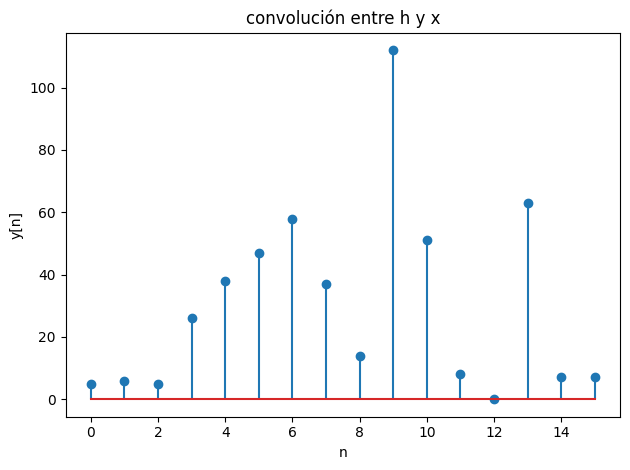

In [ ]:
h_2 = np.array([5,6,0,0,9,1,1], dtype=int)
x_2 = np.array([1,0,1,4,1,8,0,0,0,7], dtype=int)

y=np.convolve(h_2,x_2)

n_x=np.arange(len(x_2))
n_h=np.arange(len(h_2))
n_y=np.arange(len(y))
print("Marices inicales")
print("x:",x_2)
print("h:",h_2)
print("matriz convolucionada")
print("y:",y)

plt.figure()
plt.stem(n_y, y)
plt.title("convolución entre h y x")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.tight_layout()
plt.show()

Parte B

X1=  [ 1.      0.7071  0.     -0.7071 -1.     -0.7071 -0.      0.7071  1.    ]
X2=  [ 0.      0.7071  1.      0.7071  0.     -0.7071 -1.     -0.7071 -0.    ]


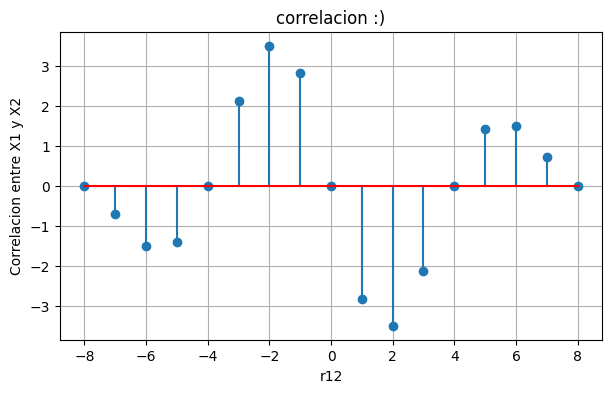

In [ ]:
Ts = 1.25E-3
f = 100
N = 9
n = np.arange(N)
w0 = 2*np.pi*f*Ts
x1 = np.cos(w0*n)
x2 = np.sin(w0*n)

print("X1= ", np.round(x1, 4))
print("X2= ", np.round(x2, 4))

r12 = np.correlate(x1, x2, mode='full')
lags = np.arange(-(N-1), N)

plt.figure(figsize=(7, 4))
plt.stem(lags, r12, basefmt='r-')
plt.title("correlacion :)")
plt.xlabel("r12")
plt.ylabel("Correlacion entre X1 y X2")
plt.grid(True)
plt.show()

**Parte C**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fN = 8000
D = 5
senal = np.loadtxt("/content/drive/MyDrive/señal_fs2000_t5.txt")


t = np.arange(len(senal)) / fs
plt.figure(figsize=(10,5))
plt.plot(t, senal)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title("Señal cargada desde archivo TXT")
plt.grid(True)
plt.show()

FileNotFoundError: /content/drive/MyDrive/señal_fs2000_t5.txt not found.

Caracterizacion

In [ ]:
media = np.mean(senal)
mediana = np.median(senal)
desviacion_estandar = np.std(senal)
maximo = np.max(senal)
minimo = np.min(senal)

print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion_estandar)
print("Maximo: ", maximo)
print("Minimo: ", minimo)

Transformada de fourier

In [ ]:
N = len(senal)
fft_v = np.fft.fft(senal)
fft_Fre = np.fft.fftfreq(N, 1/fs)

plt.figure(figsize=(10,5))
plt.plot(fft_Fre, np.abs(fft_v))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Transformada de Fourier")

Densidad espectral

In [ ]:
from scipy.signal import welch
pxx, f = welch(senal, fs, nperseg=1024)

plt.figure(figsize=(10,5))
plt.plot(f, pxx)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia")
plt.title("Densidad espectral de potencia")